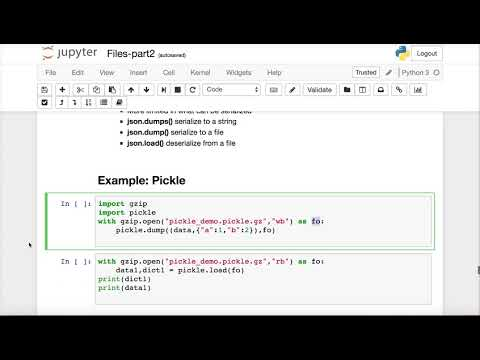

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("pcGz2zmA-vU", height=600)

# Files: Over the Web and Common Formats

In [ ]:
import os



In [ ]:
DATADIR = os.path.join(os.path.expanduser("~"),"DATA")
os.path.exists(DATADIR)

## Reading over the Web

### Big changes from Python 2.x

* **[urllib](https://docs.python.org/3/library/urllib.html)** "urllib is a package that collects several modules for working with URLs"
* **[urllib.request]()** module

### [See this HOWTO](https://docs.python.org/3/howto/urllib2.html)

### Demonstration
#### Reading the `www.python.org` web page

* `response` acts similar to a standard file object
* `display` and `HTML` are IPython functions that helps us display what we just read
```Python
import urllib.request
import IPython.display
from IPython.display import HTML, display
with urllib.request.urlopen("http://www.python.org") as response:
    pythonTxt = response.read().decode('utf-8')
display(HTML(pythonTxt))
```

In [ ]:
import urllib.request
import IPython.display
from IPython.display import HTML, display
with urllib.request.urlopen("http://www.python.org") as response:
    pythonTxt = response.read().decode('utf-8')
display(HTML(pythonTxt))

### Demonstration
#### Reading a csv file from GitHub

* [`StringIO`](https://docs.python.org/3/library/io.html#io.StringIO) Lets us treat a string like a file
* We first read the webdata into a string `f0.read().decode()
* This string is then converted into a file-like object with `StringIO`
* This file-like ojbect is then passed to the csv reader.

```Python
kb = "https://raw.githubusercontent.com/chapmanbe/pyConTextNLP/master/KB/lexical_kb_04292013.tsv"
from io import StringIO
with urllib.request.urlopen(kb) as f0:
    data = list(csv.reader(StringIO(f0.read().decode()), delimiter="\t" ))
print(data)
```

In [ ]:
import csv
kb = "https://raw.githubusercontent.com/chapmanbe/pyConTextNLP/master/KB/lexical_kb_04292013.tsv"
from io import StringIO
with urllib.request.urlopen(kb) as f0:
    data = list(csv.reader(StringIO(f0.read().decode()), delimiter="\t" ))
for d in data:
    print(d)

# Reading compressed files
* gzip
    * Allows me to open a compressed file as if it were a normal file
    * Read and write the same as the regular **open()** command


## Serialization
* Tedious to convert everything to a string
* See if Python can help you
* **Pickle**
    * Python specific
    * Allows for arbitrarily complex Python structures
        * Some limits as to what can be pickled
    * Insecure
* **json** (JavaScript Object Notation)
    * Common data exchange format
    * More limited in what can be serialized
    * **json.dumps()** serialize to a string
    * **json.dump()** serialize to a file
    * **json.load()** deserialize from a file

## Example: Pickle

In [ ]:
import gzip
import pickle
with gzip.open("pickle_demo.pickle.gz","wb") as fo:
    pickle.dump((data,{"a":1,"b":2}),fo)


In [ ]:
with gzip.open("pickle_demo.pickle.gz","rb") as fo:
    data1,dict1 = pickle.load(fo)
print(dict1)
print(data1)
    

## Example: JSON

In [ ]:
import json
with open("json_demo.json","w") as fo:
    json.dump((dict1,data1),fo)
    

In [ ]:
with open("json_demo.json","r") as fo:
    txt2 = fo.read()
txt2


In [ ]:
with open("json_demo.json","r") as fo:
    data1,dict1 = json.load(fo)
print(data1)

## Reading/Writing Images
* [PIL/Pillow](https://python-pillow.org/)
    * pip install Image
* [SimpleITK](http://www.simpleitk.org/) (N-dimensional images)
    * easy_install SimpleITK
    * Big package for dealing with N-dimensional images
    * Includes image segmentation
* scipy
    * pip install scipy
* [scikit-image](http://scikit-image.org/)
### [EXIF](https://en.wikipedia.org/wiki/Exif)

JPEG and TIFF images follow the EXIF format. We can use EXIF readers to get the header information about the image.

## Example
### Reading in image with scipy and displaying with matplotlib

In [ ]:
import matplotlib.pyplot as pp
from scipy.misc import imread, imresize, imsave
img = imread(os.path.join(DATADIR,"Images","CCTSPhi_000061_mipz.png"))
#pp.imshow(img)
#pp.show()
img2 = imresize(img,0.25)
print (img.shape)
pp.imshow(img2)
pp.show()

## Example
### Reading and Displaying images with scikit-image

In [ ]:
import skimage.io as io


img = io.imread("dog.jpg")
io.imshow(img)

#### We can also save images

In [ ]:
io.imsave("dog2.png", img)

In [ ]:
!ls -ltra


In [ ]:
!pip install exifread

In [ ]:
import exifread
with open("dog.jpg",'rb') as f0:
    tags = exifread.process_file(f0)
tags

## Sound Files

In [ ]:
from IPython.display import Audio
import scipy.io.wavfile as wavfile

### Wave file is characterized by 
* ``rate``: integer Sampling rate in Hz
* ``data``: numpy array of time series

In [ ]:
rate,data = wavfile.read(os.path.join(DATADIR,"Numerics", "Audio","rub.wav"))


In [ ]:
Audio(data=data,rate=2*rate)

In [ ]:
pp.plot(data)


## [DICOM](https://en.wikipedia.org/wiki/DICOM)

The standard image format for medical images is DICOM. DICOM image headers contain medical specific 

In [ ]:
import dicom

In [ ]:
dcm = dicom.read_file(os.path.join(DATADIR, "Images", "PE", "Ser_000006", "IM-0124-0097.dcm"))

In [ ]:
print(dcm)

In [ ]:

io.imshow(dcm.pixel_array, cmap='gray')